In [28]:
import gboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 2000)

In [29]:
    data = gboost.data_clean()
    X, y = gboost.define_features_and_target(data, 'Fraud')
    X_train, X_test, y_train, y_test = gboost.split_data(X, y)

In [30]:
    gb_params = {
        'learning_rate' : [0.1, 0.01],
        'n_estimators' : [1000, 2000, 5000],
        'subsample' : [0.5, 0.3],
        'min_samples_split' : [2],
        'max_depth' : [5, 7, 9],
    }

In [31]:
    lr_params = {
        'C' : [1, 0.1]
    }

In [32]:
mini_params = {}

In [33]:
   recall_scorer = make_scorer(gboost.score_model, greater_is_better=True)

In [34]:
    gb = GradientBoostingClassifier()
    lr = LogisticRegression()

In [35]:
    gscv = GridSearchCV(gb, param_grid=mini_params,
                        scoring=recall_scorer,
                        cv=3,
                        n_jobs=-1)

In [36]:
    clf = gscv.fit(X_train, y_train)

In [37]:
clf.best_score_

0.45577657493686674

In [41]:
importances = clf.best_estimator_.feature_importances_

In [40]:
X_train.columns

Index(['event_created', 'event_end', 'event_start', 'fb_published',
       'has_analytics', 'has_logo', 'object_id', 'show_map', 'user_age',
       'user_created', 'user_type'],
      dtype='object')

In [43]:
importances

array([0.03657868, 0.07586551, 0.07718803, 0.02212578, 0.0016107 ,
       0.09426782, 0.05829911, 0.0094368 , 0.26761532, 0.23067636,
       0.12633587])

In [42]:
idx = np.argsort(importances)

In [58]:
X_train.columns[idx][10:6:-1]

Index(['user_age', 'user_created', 'user_type', 'has_logo'], dtype='object')

In [11]:
clf.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=5,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [12]:
predictions = clf.predict(X_test)
recall_score(y_test, predictions)

0.6833855799373041

In [13]:
predicted_probs = clf.predict_proba(X_test)[:,1]

In [14]:
roc_auc_score(y_test, predicted_probs)

0.9700773812837499

In [23]:
fpr, tpr, thresh = roc_curve(y_test, predicted_probs)

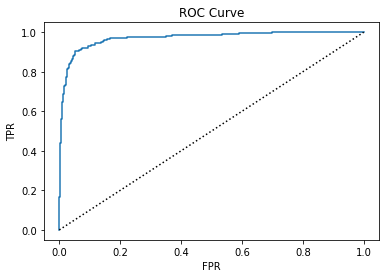

In [24]:
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k:')
plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR");

In [27]:
# pd.DataFrame(data={'frp': fpr, 'tpr': tpr, 'Thresholds': thresh})

In [16]:
import requests
api_key = 'vYm9mTUuspeyAWH1v-acfoTlck-tCxwTw9YfCynC'
url = 'https://hxobin8em5.execute-api.us-west-2.amazonaws.com/api/'
sequence_number = 0

In [17]:
response = requests.post(url, json={'api_key': api_key,
                                    'sequence_number': sequence_number})

In [18]:
raw_data = response.json()

In [20]:
import predict

KeyError: 'acct_type'